In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import datetime as dt

# Forecasting the population of the Austin Animal Center

This project uses data from the Austin Animal Center to forecast the expected population of the shelter. Forecasting the number of animals the shelter is likely to have in future is important for the shelter in terms of planning, budgeting and resourcing. 

The data I have used for this project can be downloaded from [here (intake)](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Intakes/wter-evkm) and [here (outtake)](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238).

## Data
### Initial exploration

In [50]:
intake = pd.read_csv('Austin_Animal_Center_Intakes.csv')
outtake = pd.read_csv('Austin_Animal_Center_Outcomes.csv')

In [52]:
intake.shape

(106781, 12)

In [51]:
outtake.shape

(106462, 12)

There are 106,781 observations in the intake data and 106,462 in the outtake data, and 12 variables in both.

In [53]:
intake.head()

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A802827,NaN,08/23/2019 12:22:00 PM,08/23/2019 12:22:00 PM,6407 Springdale Road in Austin (TX),Stray,Normal,Dog,Intact Male,2 years,Beagle/Australian Cattle Dog,Tricolor
1,A802826,Love,08/23/2019 12:17:00 PM,08/23/2019 12:17:00 PM,1715 West Cesar Chavez in Austin (TX),Stray,Normal,Dog,Spayed Female,2 years,Chihuahua Shorthair,Black/Brown
2,A802824,NaN,08/23/2019 12:08:00 PM,08/23/2019 12:08:00 PM,Corral Lane And Circle S Road in Austin (TX),Stray,Normal,Dog,Intact Male,5 months,Border Collie Mix,White/Brown
3,A802825,NaN,08/23/2019 12:08:00 PM,08/23/2019 12:08:00 PM,Corral Lane And Circle S Road in Austin (TX),Stray,Normal,Dog,Intact Female,1 year,Queensland Heeler Mix,White/Black
4,A802822,Remy,08/23/2019 11:31:00 AM,08/23/2019 11:31:00 AM,3207 Whitepine Drive in Austin (TX),Stray,Normal,Dog,Intact Female,4 months,Standard Poodle/Labrador Retriever,Buff


In [54]:
outtake.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A802778,Angel,08/23/2019 12:57:00 PM,08/23/2019 12:57:00 PM,08/22/2012,Adoption,NaN,Dog,Spayed Female,7 years,Chihuahua Longhair,Tan/Cream
1,A802776,Buster,08/23/2019 12:56:00 PM,08/23/2019 12:56:00 PM,08/22/2012,Adoption,NaN,Dog,Neutered Male,7 years,Miniature Poodle,Apricot
2,A797483,*June,08/23/2019 12:53:00 PM,08/23/2019 12:53:00 PM,06/14/2017,Transfer,Partner,Cat,Spayed Female,2 years,Domestic Shorthair Mix,Calico
3,A798696,*Lefty,08/23/2019 12:52:00 PM,08/23/2019 12:52:00 PM,04/22/2019,Transfer,Partner,Cat,Neutered Male,4 months,Domestic Shorthair,Black
4,A802371,NaN,08/23/2019 12:51:00 PM,08/23/2019 12:51:00 PM,05/26/2019,Transfer,Partner,Dog,Intact Female,2 months,Siberian Husky,Red/White


In [75]:
intake['DateTime'] = pd.to_datetime(intake['DateTime'])
outtake['DateTime'] = pd.to_datetime(outtake['DateTime'])

In [120]:
intake['MonthYear'] = intake['DateTime'].dt.to_period('M')
outtake['MonthYear'] = outtake['DateTime'].dt.to_period('M')

In [121]:
intake.head()

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A802827,NaN,2019-08-23 12:22:00,2019-08,6407 Springdale Road in Austin (TX),Stray,Normal,Dog,Intact Male,2 years,Beagle/Australian Cattle Dog,Tricolor
1,A802826,Love,2019-08-23 12:17:00,2019-08,1715 West Cesar Chavez in Austin (TX),Stray,Normal,Dog,Spayed Female,2 years,Chihuahua Shorthair,Black/Brown
2,A802824,NaN,2019-08-23 12:08:00,2019-08,Corral Lane And Circle S Road in Austin (TX),Stray,Normal,Dog,Intact Male,5 months,Border Collie Mix,White/Brown
3,A802825,NaN,2019-08-23 12:08:00,2019-08,Corral Lane And Circle S Road in Austin (TX),Stray,Normal,Dog,Intact Female,1 year,Queensland Heeler Mix,White/Black
4,A802822,Remy,2019-08-23 11:31:00,2019-08,3207 Whitepine Drive in Austin (TX),Stray,Normal,Dog,Intact Female,4 months,Standard Poodle/Labrador Retriever,Buff


In [55]:
intake.isnull().sum()

Animal ID               0
Name                33767
DateTime                0
MonthYear               0
Found Location          0
Intake Type             0
Intake Condition        0
Animal Type             0
Sex upon Intake         1
Age upon Intake         0
Breed                   0
Color                   0
dtype: int64

In [56]:
outtake.isnull().sum()

Animal ID               0
Name                33462
DateTime                0
MonthYear               0
Date of Birth           0
Outcome Type            7
Outcome Subtype     57975
Animal Type             0
Sex upon Outcome        3
Age upon Outcome       13
Breed                   0
Color                   0
dtype: int64

There is very little data missing from the dataset. The outcome subtype is often missing but this may be because it is often not relevant (e.g. there appears to be no subtype needed if the animal was returned to owner). The most important features for time series analysis are the times and the type of animal (as I am assuming the population patterns vary by animal). This data appears complete.

### Exploratory data analysis

#### Animal features

In [57]:
intake['Animal Type'].value_counts()

Dog          60542
Cat          40133
Other         5607
Bird           484
Livestock       15
Name: Animal Type, dtype: int64

In [58]:
outtake['Animal Type'].value_counts()

Dog          60487
Cat          39884
Other         5592
Bird           483
Livestock       16
Name: Animal Type, dtype: int64

More animals of each time arrive than leave the shelter which makes sense, except livestock!

In [59]:
intake['Breed'].value_counts()

Domestic Shorthair Mix                                  29851
Pit Bull Mix                                             7976
Labrador Retriever Mix                                   6230
Chihuahua Shorthair Mix                                  5985
Domestic Medium Hair Mix                                 2993
Domestic Shorthair                                       2816
German Shepherd Mix                                      2718
Bat Mix                                                  1750
Domestic Longhair Mix                                    1487
Australian Cattle Dog Mix                                1360
Siamese Mix                                              1209
Bat                                                      1027
Dachshund Mix                                             972
Boxer Mix                                                 881
Border Collie Mix                                         864
Miniature Poodle Mix                                      799
Siberian

There are 2,447 different intake breeds which look to be mostly (though not exclusively) related to dogs. There is likely to be some overlap in the labels (e.g. the Jack Russell Terrier Mix might be the same as a Jack Russell Terrier/Shetland Sheepdog).

In [61]:
intake['Color'].value_counts()

Black/White                 11164
Black                        8994
Brown Tabby                  6071
Brown                        4576
White                        3770
Brown/White                  3420
Tan/White                    3293
Brown Tabby/White            3140
Orange Tabby                 2983
White/Black                  2911
Blue/White                   2906
Tan                          2698
Tricolor                     2514
Black/Tan                    2423
Black/Brown                  2233
White/Brown                  2072
Brown/Black                  1868
Blue                         1847
Tortie                       1838
Calico                       1828
Brown Brindle/White          1821
White/Tan                    1653
Blue Tabby                   1541
Orange Tabby/White           1439
Red                          1358
Torbie                       1177
Red/White                    1144
Tan/Black                     967
Brown Brindle                 938
Chocolate/Whit

There are 573 colors which again probably show some overlap (White/Tan vs Tan/White).

The large number of breeds and colors mean that it would be impossible to use these variables as sub-forecasts without extensive data cleaning.

In [62]:
intake['Intake Type'].value_counts()

Stray                 75379
Owner Surrender       20291
Public Assist          6664
Wildlife               4192
Euthanasia Request      255
Name: Intake Type, dtype: int64

In [96]:
intake_type = ['Stray', 'Owner Surrender', 'Public Assist', 'Wildlife', 'Euthanasia Request']
complete_years = [2014, 2015, 2016, 2017, 2018]
intake_dict = dict()

for t in intake_type:
    t_count = []
    for y in complete_years:
        t_count.append(intake.loc[(intake['Intake Type'] == t) & (intake['DateTime'].apply(lambda x: x.year == y)), ].shape[0])
    t_count = np.array(t_count)
    intake_dict[str(t)] = t_count

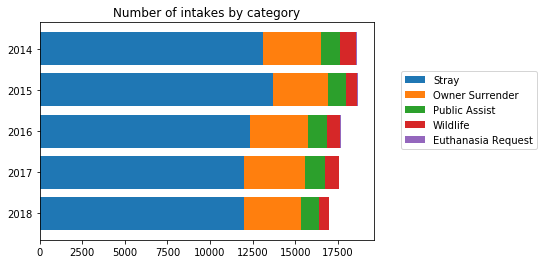

In [97]:
plt.barh(y=complete_years, width=intake_dict['Stray'], tick_label=complete_years, label='Stray')
plt.barh(y=complete_years, width=intake_dict['Owner Surrender'], left=intake_dict['Stray'], label='Owner Surrender')
plt.barh(y=complete_years, width=intake_dict['Public Assist'], left=(intake_dict['Stray'] + intake_dict['Owner Surrender']), label='Public Assist')
plt.barh(y=complete_years, width=intake_dict['Wildlife'], left=(intake_dict['Stray'] + intake_dict['Owner Surrender'] + intake_dict['Public Assist']), label='Wildlife')
plt.barh(y=complete_years, width=intake_dict['Euthanasia Request'], left=(intake_dict['Stray'] + intake_dict['Owner Surrender'] + intake_dict['Public Assist'] + intake_dict['Wildlife']), label='Euthanasia Request')
plt.gca().invert_yaxis()
plt.legend(bbox_to_anchor=(1.5, 0.8))
plt.title('Number of intakes by category')
plt.show()

In [98]:
outtake['Outcome Type'].value_counts()

Adoption           46278
Transfer           31786
Return to Owner    19062
Euthanasia          7395
Died                1000
Rto-Adopt            447
Disposal             403
Missing               65
Relocate              19
Name: Outcome Type, dtype: int64

In [99]:
intake['DateTime'].describe()

count                  106781
unique                  75448
top       2016-09-23 12:00:00
freq                       64
first     2013-10-01 07:51:00
last      2019-08-23 12:22:00
Name: DateTime, dtype: object

In [100]:
outtake['DateTime'].describe()

count                  106462
unique                  87609
top       2016-04-18 00:00:00
freq                       39
first     2013-10-01 09:31:00
last      2019-08-23 12:57:00
Name: DateTime, dtype: object

The dataset approximately covers the period from October 2013 to now (August 2019).

#### Monthly trends

In [123]:
df_in = pd.DataFrame(intake.loc[intake['Animal Type'] == 'Cat', 'MonthYear'].value_counts())
df_in.reset_index(inplace=True)
df_in.rename(columns={'index': 'date', 'MonthYear': 'intake'}, inplace=True)

In [145]:
pd.to_datetime(str(df_in.loc[0, 'date']))

Timestamp('2019-05-01 00:00:00')

In [101]:
animal_types = ['Dog', 'Cat', 'Other', 'Bird', 'Livestock']

In [148]:
monthly_in_out = dict()

for animal in animal_types:
    df_in = pd.DataFrame(intake.loc[intake['Animal Type'] == animal, 'MonthYear'].value_counts())
    df_in.reset_index(inplace=True)
    df_in.rename(columns={'index': 'date', 'MonthYear': 'intake'}, inplace=True)
    df_in['date'] = pd.to_datetime(df_in['date'].apply(lambda x: str(x)))
    df_in.sort_values('date', inplace=True)
    df_in.reset_index(inplace=True, drop=True)
    df_out = pd.DataFrame(outtake.loc[outtake['Animal Type'] == animal, 'MonthYear'].value_counts())
    df_out.reset_index(inplace=True)
    df_out.rename(columns={'index': 'date', 'MonthYear': 'outtake'}, inplace=True)
    df_out['date'] = pd.to_datetime(df_out['date'].apply(lambda x: str(x)))
    df_out.sort_values('date', inplace=True)
    df_out.reset_index(inplace=True, drop=True)
    monthly_in_out[str(animal)+'_in'] = df_in
    monthly_in_out[str(animal)+'_out'] = df_out

all_in = pd.DataFrame(intake.loc[:, 'MonthYear'].value_counts())
all_in.reset_index(inplace=True)
all_in.rename(columns={'index': 'date', 'MonthYear': 'intake'}, inplace=True)
all_in['date'] = pd.to_datetime(all_in['date'].apply(lambda x: str(x)))
all_in.sort_values('date', inplace=True)
all_in.reset_index(inplace=True, drop=True)
    
all_out = pd.DataFrame(outtake.loc[:, 'MonthYear'].value_counts())
all_out.reset_index(inplace=True)
all_out.rename(columns={'index': 'date', 'MonthYear': 'outtake'}, inplace=True)
all_out['date'] = pd.to_datetime(all_out['date'].apply(lambda x: str(x)))
all_out.sort_values('date', inplace=True)
all_out.reset_index(inplace=True, drop=True)  

monthly_in_out['all_in'] = all_in
monthly_in_out['all_out'] = all_out

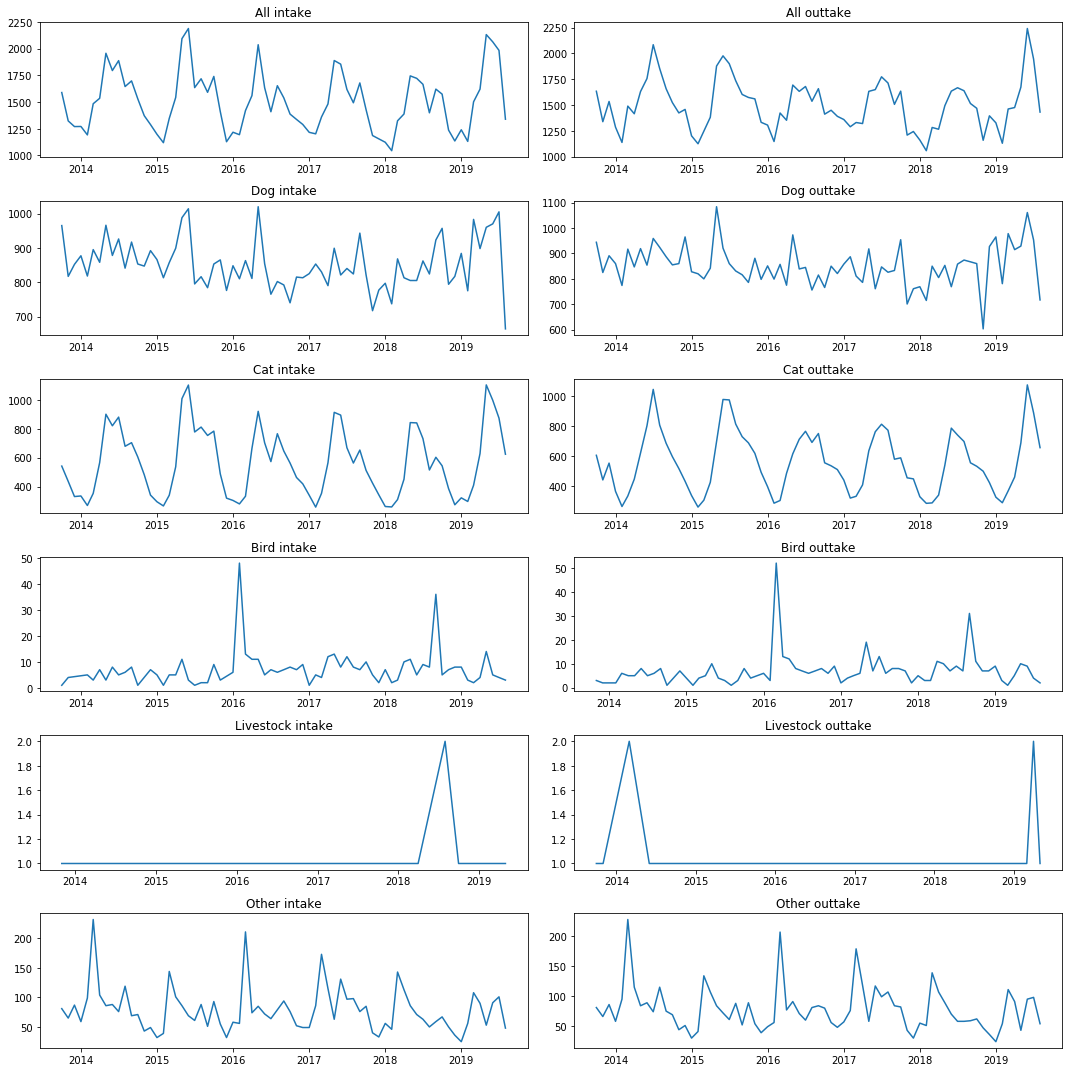

In [150]:
fig, ax = plt.subplots(6, 2, figsize=(15, 15))

ax1 = plt.subplot(6, 2, 1)
ax1.plot(monthly_in_out['all_in']['date'], monthly_in_out['all_in']['intake'])
ax1.set_title('All intake')

ax2 = plt.subplot(6, 2, 2)
ax2.plot(monthly_in_out['all_out']['date'], monthly_in_out['all_out']['outtake'])
ax2.set_title('All outtake')

ax3 = plt.subplot(6, 2, 3)
ax3.plot(monthly_in_out['Dog_in']['date'], monthly_in_out['Dog_in']['intake'])
ax3.set_title('Dog intake')

ax4 = plt.subplot(6, 2, 4)
ax4.plot(monthly_in_out['Dog_out']['date'], monthly_in_out['Dog_out']['outtake'])
ax4.set_title('Dog outtake')

ax5 = plt.subplot(6, 2, 5)
ax5.plot(monthly_in_out['Cat_in']['date'], monthly_in_out['Cat_in']['intake'])
ax5.set_title('Cat intake')

ax6 = plt.subplot(6, 2, 6)
ax6.plot(monthly_in_out['Cat_out']['date'], monthly_in_out['Cat_out']['outtake'])
ax6.set_title('Cat outtake')

ax7 = plt.subplot(6, 2, 7)
ax7.plot(monthly_in_out['Bird_in']['date'], monthly_in_out['Bird_in']['intake'])
ax7.set_title('Bird intake')

ax8 = plt.subplot(6, 2, 8)
ax8.plot(monthly_in_out['Bird_out']['date'], monthly_in_out['Bird_out']['outtake'])
ax8.set_title('Bird outtake')

ax9 = plt.subplot(6, 2, 9)
ax9.plot(monthly_in_out['Livestock_in']['date'], monthly_in_out['Livestock_in']['intake'])
ax9.set_title('Livestock intake')

ax10 = plt.subplot(6, 2, 10)
ax10.plot(monthly_in_out['Livestock_out']['date'], monthly_in_out['Livestock_out']['outtake'])
ax10.set_title('Livestock outtake')

ax11 = plt.subplot(6, 2, 11)
ax11.plot(monthly_in_out['Other_in']['date'], monthly_in_out['Other_in']['intake'])
ax11.set_title('Other intake')

ax12 = plt.subplot(6, 2, 12)
ax12.plot(monthly_in_out['Other_out']['date'], monthly_in_out['Other_out']['outtake'])
ax12.set_title('Other outtake')

plt.tight_layout()
plt.show()

There is clear seasonality in the intake and outtake which is driven mostly by cats. There are many more cats being taken in and also adopted during the summer - this is probably 'kitten season'. The dog intake appears to be slowly declining over time. The bird intake and outtake is generally low with one large outlier - perhaps several birds were lost and found together? The livestock are so low they should be grouped with other. The 'other' intake shows some seasonality with spikes in the first quarter of the year. <br>

There is a tailing off of outtake at the end of the dataset. This is a function of the dataset only including animals which both entered and left the center during this period. It is likely that there is a corresponding number of animals leaving the center at the start of the period which are not visible in this dataset because they entered the center before the starting date of this dataset.

#### Daily trends

In [151]:
time_period = pd.date_range(pd.to_datetime('2013-10-01'), pd.to_datetime('2019-08-23'))
pop = pd.DataFrame()
pop['date'] = time_period

In [152]:
intake['date_in'] = pd.to_datetime(intake['DateTime']).apply(lambda x: x.date())
outtake['date_out'] = pd.to_datetime(outtake['DateTime']).apply(lambda x: x.date())

In [154]:
pop_dict = dict()

for animal in animal_types:
    animal_in = []
    animal_out = []
    for date in time_period:
        animal_in.append(sum(date.date() == intake.loc[intake['Animal Type'] == animal, 'date_in']))
        animal_out.append(sum(date.date() == outtake.loc[outtake['Animal Type'] == animal, 'date_out']))
    pop_dict[str(animal)+'_in'] = animal_in
    pop_dict[str(animal)+'_out'] = animal_out

In [155]:
for animal in animal_types:
    pop[str(animal)+'_in'] = pop_dict[str(animal)+'_in']
    pop[str(animal)+'_out'] = pop_dict[str(animal)+'_out']
    pop[str(animal)+'_change'] = pop[str(animal)+'_in'] - pop[str(animal)+'_out']
    pop[str(animal)+'_pop'] = pop[str(animal)+'_change'].expanding(1).sum()

In [156]:
pop_total = pop.groupby(pop.columns.str.split("_").str[1],axis=1).sum()
pop = pd.concat([pop, pop_total], axis=1)

In [157]:
pop.head()

,date,Dog_in,Dog_out,Dog_change,Dog_pop,Cat_in,Cat_out,Cat_change,Cat_pop,Other_in,...,Bird_change,Bird_pop,Livestock_in,Livestock_out,Livestock_change,Livestock_pop,change,in,out,pop
0,2013-10-01,42,29,13,13.0,35,23,12,12.0,0,...,0,0.0,0,0,0,0.0,25,77,52,25.0
1,2013-10-02,28,33,-5,8.0,22,30,-8,4.0,3,...,0,0.0,0,0,0,0.0,-12,53,65,13.0
2,2013-10-03,26,18,8,16.0,14,17,-3,1.0,2,...,0,0.0,0,1,-1,-1.0,4,42,38,17.0
3,2013-10-04,30,23,7,23.0,16,5,11,12.0,1,...,0,0.0,0,0,0,-1.0,19,47,28,36.0
4,2013-10-05,39,38,1,24.0,26,25,1,13.0,2,...,0,0.0,0,0,0,-1.0,1,67,66,37.0


In [158]:
pop.columns

Index(['date', 'Dog_in', 'Dog_out', 'Dog_change', 'Dog_pop', 'Cat_in',
       'Cat_out', 'Cat_change', 'Cat_pop', 'Other_in', 'Other_out',
       'Other_change', 'Other_pop', 'Bird_in', 'Bird_out', 'Bird_change',
       'Bird_pop', 'Livestock_in', 'Livestock_out', 'Livestock_change',
       'Livestock_pop', 'change', 'in', 'out', 'pop'],
      dtype='object')

In [159]:
pop.columns = ['date', 'dog_in', 'dog_out', 'dog_change', 'dog_pop',
               'cat_in', 'cat_out', 'cat_change', 'cat_pop',
               'other_in', 'other_out', 'other_change', 'other_pop', 
               'bird_in', 'bird_out', 'bird_change', 'bird_pop',
               'livestock_in', 'livestock_out', 'livestock_change', 'livestock_pop',
               'all_change', 'all_in', 'all_out', 'all_pop']

In [160]:
pop.head()

,date,dog_in,dog_out,dog_change,dog_pop,cat_in,cat_out,cat_change,cat_pop,other_in,...,bird_change,bird_pop,livestock_in,livestock_out,livestock_change,livestock_pop,all_change,all_in,all_out,all_pop
0,2013-10-01,42,29,13,13.0,35,23,12,12.0,0,...,0,0.0,0,0,0,0.0,25,77,52,25.0
1,2013-10-02,28,33,-5,8.0,22,30,-8,4.0,3,...,0,0.0,0,0,0,0.0,-12,53,65,13.0
2,2013-10-03,26,18,8,16.0,14,17,-3,1.0,2,...,0,0.0,0,1,-1,-1.0,4,42,38,17.0
3,2013-10-04,30,23,7,23.0,16,5,11,12.0,1,...,0,0.0,0,0,0,-1.0,19,47,28,36.0
4,2013-10-05,39,38,1,24.0,26,25,1,13.0,2,...,0,0.0,0,0,0,-1.0,1,67,66,37.0


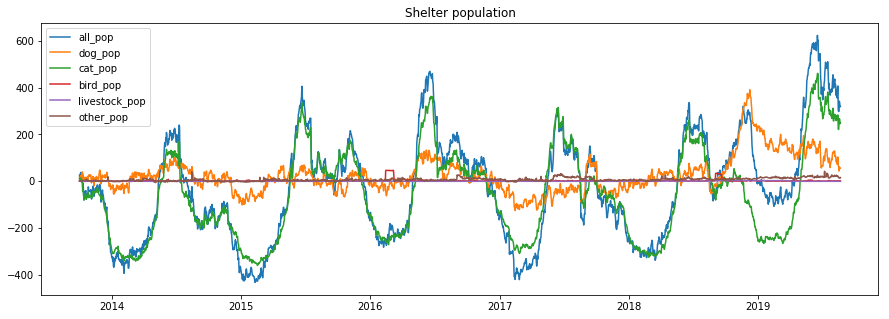

In [161]:
fig = plt.figure(figsize = (15, 5))

plt.plot(pop.date, pop.all_pop)
plt.plot(pop.date, pop.dog_pop)
plt.plot(pop.date, pop.cat_pop)
plt.plot(pop.date, pop.bird_pop)
plt.plot(pop.date, pop.livestock_pop)
plt.plot(pop.date, pop.other_pop)

plt.title('Shelter population')
plt.legend()
plt.show()

The shelter population is clearly driven by the changes in the cat population. The dog population remains relatively constant all year round and the bird, livestock and other populations are so small they are a negligible part of the total. 
<br>
Because the starting shelter population is unknown, the time series is sometimes negative. I will increase each animal population by the number at the lowest point so that the populations are never negative.

In [162]:
pop.min()

date                2013-10-01 00:00:00
dog_in                                1
dog_out                               0
dog_change                          -58
dog_pop                            -126
cat_in                                0
cat_out                               0
cat_change                         -150
cat_pop                            -361
other_in                              0
other_out                             0
other_change                        -38
other_pop                            -4
bird_in                               0
bird_out                              0
bird_change                         -26
bird_pop                              0
livestock_in                          0
livestock_out                         0
livestock_change                     -2
livestock_pop                        -1
all_change                         -159
all_in                                4
all_out                               2
all_pop                            -434


In [163]:
pop['dog_pop_rebased'] = pop['dog_pop'] + 126
pop['cat_pop_rebased'] = pop['cat_pop'] + 361
pop['other_pop_rebased'] = pop['other_pop'] + 4
pop['bird_pop_rebased'] = pop['bird_pop'] + 0
pop['livestock_pop_rebased'] = pop['livestock_pop'] + 1
pop['all_pop_rebased'] = pop['all_pop'] + (126+361+4+0+1)

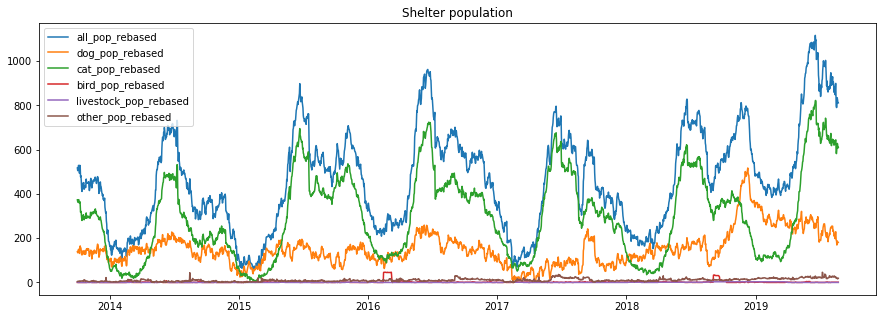

In [164]:
fig = plt.figure(figsize = (15, 5))

plt.plot(pop.date, pop.all_pop_rebased)
plt.plot(pop.date, pop.dog_pop_rebased)
plt.plot(pop.date, pop.cat_pop_rebased)
plt.plot(pop.date, pop.bird_pop_rebased)
plt.plot(pop.date, pop.livestock_pop_rebased)
plt.plot(pop.date, pop.other_pop_rebased)

plt.title('Shelter population')
plt.legend()
plt.show()

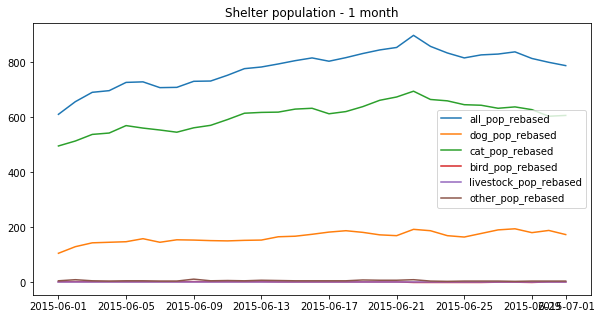

In [165]:
fig = plt.figure(figsize = (10, 5))

plt.plot('date', 'all_pop_rebased', data=pop.loc[pop['date'].isin(pd.date_range('2015-06-01', '2015-07-01')), ])
plt.plot('date', 'dog_pop_rebased', data=pop.loc[pop['date'].isin(pd.date_range('2015-06-01', '2015-07-01')), ])
plt.plot('date', 'cat_pop_rebased', data=pop.loc[pop['date'].isin(pd.date_range('2015-06-01', '2015-07-01')), ])
plt.plot('date', 'bird_pop_rebased', data=pop.loc[pop['date'].isin(pd.date_range('2015-06-01', '2015-07-01')), ])
plt.plot('date', 'livestock_pop_rebased', data=pop.loc[pop['date'].isin(pd.date_range('2015-06-01', '2015-07-01')), ])
plt.plot('date', 'other_pop_rebased', data=pop.loc[pop['date'].isin(pd.date_range('2015-06-01', '2015-07-01')), ])

plt.title('Shelter population - 1 month')
plt.legend()
plt.show()

There is no obvious weekly seasonality.

### Data cleaning

The rebased population data will be used as the purpose is to make the time series positive only as negative numbers make no sense for a population. The livestock and birds will be incorporated within 'other' as the changes in population are sporadic, not daily like cats and dogs.
<br>

The missing values will not be filled at this time as there is no intent to use any of the variables with missing values in this project.

In [166]:
pop['other_in'] = pop['other_in'] + pop['bird_in'] + pop['livestock_in']
pop['other_out'] = pop['other_out'] + pop['bird_out'] + pop['livestock_out']
pop['other_change'] = pop['other_change'] + pop['bird_change'] + pop['livestock_change']
pop['other_pop'] = pop['other_pop'] + pop['bird_pop'] + pop['livestock_pop']
pop['other_pop_rebased'] = pop['other_pop_rebased'] + pop['bird_pop_rebased'] + pop['livestock_pop_rebased']
pop.drop(['bird_in', 'bird_out', 'bird_change', 'bird_pop', 'bird_pop_rebased', 'livestock_in', 'livestock_out', 'livestock_change', 'livestock_pop', 'livestock_pop_rebased'], axis=1, inplace=True)

In [167]:
pop.head()

,date,dog_in,dog_out,dog_change,dog_pop,cat_in,cat_out,cat_change,cat_pop,other_in,...,other_change,other_pop,all_change,all_in,all_out,all_pop,dog_pop_rebased,cat_pop_rebased,other_pop_rebased,all_pop_rebased
0,2013-10-01,42,29,13,13.0,35,23,12,12.0,0,...,0,0.0,25,77,52,25.0,139.0,373.0,5.0,517.0
1,2013-10-02,28,33,-5,8.0,22,30,-8,4.0,3,...,1,1.0,-12,53,65,13.0,134.0,365.0,6.0,505.0
2,2013-10-03,26,18,8,16.0,14,17,-3,1.0,2,...,-1,0.0,4,42,38,17.0,142.0,362.0,5.0,509.0
3,2013-10-04,30,23,7,23.0,16,5,11,12.0,1,...,1,1.0,19,47,28,36.0,149.0,373.0,6.0,528.0
4,2013-10-05,39,38,1,24.0,26,25,1,13.0,2,...,-1,0.0,1,67,66,37.0,150.0,374.0,5.0,529.0


### Supplementary data
#### Population of Austin, Texas, over time

The information comes from the census, [here](https://factfinder.census.gov/bkmk/table/1.0/en/PEP/2018/PEPANNRES/1620000US4805000).

In [242]:
austin_pop = pd.read_csv('./austin_pop/PEP_2018_PEPANNRES_with_ann.csv')

In [243]:
austin_pop.head()

,GEO.id,GEO.id2,GEO.display-label,rescen42010,resbase42010,respop72010,respop72011,respop72012,respop72013,respop72014,respop72015,respop72016,respop72017,respop72018
0,Id,Id2,Geography,"April 1, 2010 - Census","April 1, 2010 - Estimates Base",Population Estimate (as of July 1) - 2010,Population Estimate (as of July 1) - 2011,Population Estimate (as of July 1) - 2012,Population Estimate (as of July 1) - 2013,Population Estimate (as of July 1) - 2014,Population Estimate (as of July 1) - 2015,Population Estimate (as of July 1) - 2016,Population Estimate (as of July 1) - 2017,Population Estimate (as of July 1) - 2018
1,1620000US4805000,4805000,"Austin city, Texas",790390,802078,806423,828694,854841,875463,901734,921545,939768,951750,964254


In [244]:
austin_pop = austin_pop.T
austin_pop.set_index(0, inplace=True)
austin_pop = austin_pop.T

In [245]:
austin_pop.columns = ['id1', 'id2', 'place', '2010-census', '2010-base', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018' ]

In [246]:
austin_pop = austin_pop.drop(['id1', 'id2', 'place', '2010-census', '2010-base', '2010', '2011', '2012'], axis=1)

In [247]:
austin_pop['2019'] = np.nan

In [248]:
austin_pop = austin_pop.T

In [249]:
austin_pop.reset_index(inplace=True)

In [250]:
austin_pop.columns = ['year', 'population']
austin_pop['year'] = austin_pop['year'].apply(lambda x: int(x))

In [251]:
austin_pop

,year,population
0,2013,875463
1,2014,901734
2,2015,921545
3,2016,939768
4,2017,951750
5,2018,964254
6,2019,NaN


#### Labor force and unemployment

In [258]:
austin_empl = pd.read_excel('austin-bureau-labor-stats2.xlsx')

In [259]:
austin_empl.tail(10)

,Year,Period,labor force,employment,unemployment,unemployment rate
116,2018,Sep,1200200(R),1165553(R),34647(R),2.9(R)
117,2018,Oct,1203065(R),1169689(R),33376(R),2.8(R)
118,2018,Nov,1207111(R),1174196(R),32915(R),2.7(R)
119,2018,Dec,1205457(R),1172355(R),33102(R),2.7(R)
120,2019,Jan,1206140,1165981,40159,3.3
121,2019,Feb,1216398,1179863,36535,3
122,2019,Mar,1213676,1180555,33121,2.7
123,2019,Apr,1210748,1183086,27662,2.3
124,2019,May,1210013,1183030,26983,2.2
125,2019,Jun,1215794(P),1182597(P),33197(P),2.7(P)


In [260]:
austin_empl_str = austin_empl.loc[(austin_empl['Year'] > 2012) & (austin_empl['Year'] < 2019), ]
austin_empl_str.reset_index(inplace=True, drop=True)

In [261]:
austin_empl_str.head()

,Year,Period,labor force,employment,unemployment,unemployment rate
0,2013,Jan,1005093(R),946371(R),58722(R),5.8(R)
1,2013,Feb,1005915(R),951200(R),54715(R),5.4(R)
2,2013,Mar,1007499(R),954299(R),53200(R),5.3(R)
3,2013,Apr,1015041(R),965200(R),49841(R),4.9(R)
4,2013,May,1019148(R),966562(R),52586(R),5.2(R)


In [262]:
austin_empl_str.tail(10)

,Year,Period,labor force,employment,unemployment,unemployment rate
62,2018,Mar,1192406(R),1156122(R),36284(R),3.0(R)
63,2018,Apr,1193943(R),1161583(R),32360(R),2.7(R)
64,2018,May,1194067(R),1161918(R),32149(R),2.7(R)
65,2018,Jun,1201136(R),1162559(R),38577(R),3.2(R)
66,2018,Jul,1204323(R),1166669(R),37654(R),3.1(R)
67,2018,Aug,1191906(R),1155287(R),36619(R),3.1(R)
68,2018,Sep,1200200(R),1165553(R),34647(R),2.9(R)
69,2018,Oct,1203065(R),1169689(R),33376(R),2.8(R)
70,2018,Nov,1207111(R),1174196(R),32915(R),2.7(R)
71,2018,Dec,1205457(R),1172355(R),33102(R),2.7(R)


In [263]:
## Extract first half of 2019

austin_empl_19a = austin_empl.loc[(austin_empl['Year'] == 2019) & (austin_empl['Period'] != 'Jun'), ]
austin_empl_19a.reset_index(inplace=True, drop=True)
austin_empl_19 = pd.DataFrame({'monthyear': austin_empl_19a['Year'].map(str) + ' ' + austin_empl_19a['Period']})
austin_empl_19['monthyear'] = pd.to_datetime(austin_empl_19['monthyear'])

for col in ['labor force', 'employment', 'unemployment', 'unemployment rate']:
    new_col = austin_empl_19a[col]
    austin_empl_19[col] = new_col
    austin_empl_19[col].apply(lambda x: float(x))

In [264]:
## Clean June with P

austin_empl_juna = austin_empl.loc[(austin_empl['Year'] == 2019) & (austin_empl['Period'] == 'Jun'), ]
austin_empl_juna.reset_index(inplace=True, drop=True)
austin_empl_jun = pd.DataFrame({'monthyear': austin_empl_juna['Year'].map(str) + ' ' + austin_empl_juna['Period']})
austin_empl_jun['monthyear'] = pd.to_datetime(austin_empl_jun['monthyear'])

for col in ['labor force', 'employment', 'unemployment', 'unemployment rate']:
    new_col = austin_empl_juna[col].str.split('\(', expand=True)
    austin_empl_jun[col] = new_col[0]
    austin_empl_jun[col].apply(lambda x: float(x))

In [265]:
## Clean earlier dates with R

austin_empl_1218 = pd.DataFrame({'monthyear': austin_empl_str['Year'].map(str) + ' ' + austin_empl_str['Period']})
austin_empl_1218['monthyear'] = pd.to_datetime(austin_empl_1218['monthyear'])

for col in ['labor force', 'employment', 'unemployment', 'unemployment rate']:
    new_col = austin_empl_str[col].str.split('\(', expand=True)
    austin_empl_1218[col] = new_col[0]
    austin_empl_1218[col].apply(lambda x: float(x))

In [266]:
austin_empl_clean = pd.concat([austin_empl_1218, austin_empl_19, austin_empl_jun], axis=0)
austin_empl_clean.reset_index(inplace=True, drop=True)
austin_empl_clean.tail(10)

,monthyear,labor force,employment,unemployment,unemployment rate
68,2018-09-01,1200200,1165553,34647,2.9
69,2018-10-01,1203065,1169689,33376,2.8
70,2018-11-01,1207111,1174196,32915,2.7
71,2018-12-01,1205457,1172355,33102,2.7
72,2019-01-01,1206140,1165981,40159,3.3
73,2019-02-01,1216398,1179863,36535,3
74,2019-03-01,1213676,1180555,33121,2.7
75,2019-04-01,1210748,1183086,27662,2.3
76,2019-05-01,1210013,1183030,26983,2.2
77,2019-06-01,1215794,1182597,33197,2.7


In [267]:
austin_empl_clean = austin_empl_clean.T
austin_empl_clean.head()

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
monthyear,2013-01-01 00:00:00,2013-02-01 00:00:00,2013-03-01 00:00:00,2013-04-01 00:00:00,2013-05-01 00:00:00,2013-06-01 00:00:00,2013-07-01 00:00:00,2013-08-01 00:00:00,2013-09-01 00:00:00,2013-10-01 00:00:00,...,2018-09-01 00:00:00,2018-10-01 00:00:00,2018-11-01 00:00:00,2018-12-01 00:00:00,2019-01-01 00:00:00,2019-02-01 00:00:00,2019-03-01 00:00:00,2019-04-01 00:00:00,2019-05-01 00:00:00,2019-06-01 00:00:00
labor force,1005093,1005915,1007499,1015041,1019148,1023916,1023606,1019741,1026197,1024659,...,1200200,1203065,1207111,1205457,1206140,1216398,1213676,1210748,1210013,1215794
employment,946371,951200,954299,965200,966562,965629,966871,965999,973333,972454,...,1165553,1169689,1174196,1172355,1165981,1179863,1180555,1183086,1183030,1182597
unemployment,58722,54715,53200,49841,52586,58287,56735,53742,52864,52205,...,34647,33376,32915,33102,40159,36535,33121,27662,26983,33197
unemployment rate,5.8,5.4,5.3,4.9,5.2,5.7,5.5,5.3,5.2,5.1,...,2.9,2.8,2.7,2.7,3.3,3,2.7,2.3,2.2,2.7


In [268]:
austin_empl_clean[78] = [pd.to_datetime('2019-07-01'), np.nan, np.nan, np.nan, np.nan]
austin_empl_clean[79] = [pd.to_datetime('2019-08-01'), np.nan, np.nan, np.nan, np.nan]

In [269]:
austin_empl_clean = austin_empl_clean.T

### All data together

In [270]:
data = pop.copy()

data['austin_pop'] = pop['date'].apply(lambda x: austin_pop.loc[austin_pop.year == x.year, 'population'].values[0])
data['austin_lf'] = pop['date'].apply(lambda x: austin_empl_clean.loc[austin_empl_clean.monthyear == (pd.to_datetime(str(x.year) + ' ' + str(x.month))), 'labor force'].values[0])
data['austin_ur'] = pop['date'].apply(lambda x: austin_empl_clean.loc[austin_empl_clean.monthyear == (pd.to_datetime(str(x.year) + ' ' + str(x.month))), 'unemployment rate'].values[0])

In [271]:
data.head()

,date,dog_in,dog_out,dog_change,dog_pop,cat_in,cat_out,cat_change,cat_pop,other_in,...,all_in,all_out,all_pop,dog_pop_rebased,cat_pop_rebased,other_pop_rebased,all_pop_rebased,austin_pop,austin_lf,austin_ur
0,2013-10-01,42,29,13,13.0,35,23,12,12.0,0,...,77,52,25.0,139.0,373.0,5.0,517.0,875463,1024659,5.1
1,2013-10-02,28,33,-5,8.0,22,30,-8,4.0,3,...,53,65,13.0,134.0,365.0,6.0,505.0,875463,1024659,5.1
2,2013-10-03,26,18,8,16.0,14,17,-3,1.0,2,...,42,38,17.0,142.0,362.0,5.0,509.0,875463,1024659,5.1
3,2013-10-04,30,23,7,23.0,16,5,11,12.0,1,...,47,28,36.0,149.0,373.0,6.0,528.0,875463,1024659,5.1
4,2013-10-05,39,38,1,24.0,26,25,1,13.0,2,...,67,66,37.0,150.0,374.0,5.0,529.0,875463,1024659,5.1


In [272]:
data.tail()

,date,dog_in,dog_out,dog_change,dog_pop,cat_in,cat_out,cat_change,cat_pop,other_in,...,all_in,all_out,all_pop,dog_pop_rebased,cat_pop_rebased,other_pop_rebased,all_pop_rebased,austin_pop,austin_lf,austin_ur
2148,2019-08-19,25,44,-19,43.0,39,18,21,242.0,2,...,66,64,300.0,169.0,603.0,20.0,792.0,NaN,NaT,NaT
2149,2019-08-20,35,17,18,61.0,46,21,25,267.0,0,...,81,39,342.0,187.0,628.0,19.0,834.0,NaN,NaT,NaT
2150,2019-08-21,31,36,-5,56.0,32,35,-3,264.0,3,...,66,76,332.0,182.0,625.0,17.0,824.0,NaN,NaT,NaT
2151,2019-08-22,32,32,0,56.0,13,31,-18,246.0,4,...,49,63,318.0,182.0,607.0,21.0,810.0,NaN,NaT,NaT
2152,2019-08-23,12,13,-1,55.0,5,2,3,249.0,0,...,17,16,319.0,181.0,610.0,20.0,811.0,NaN,NaT,NaT


In [ ]:
## Modeling!!